In [1]:
import os
import sys
import urllib.request
import re
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
client_id = "6edzCNnNWRuAcEfH4xKc"
client_secret = "T6ZF8xVRNj"
def korean_font():
    plt.rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
    

In [82]:
keywordGroups = []
url = "https://openapi.naver.com/v1/datalab/search"

def add_keyword_groups(group_dict):
    global keywordGroups
    keyword_gorup = {
        'groupName': group_dict['groupName'],
        'keywords': group_dict['keywords']
    }        
    keywordGroups.append(keyword_gorup)
    print(f">>> Num of keywordGroups: {len(keywordGroups)}")

def get_data(url, startDate, endDate, timeUnit, keywordGroups, device, ages, gender):
    # 데이터 요청 사항 입력
    global client_id, client_secret
    body = json.dumps({
        "startDate": startDate,
        "endDate": endDate,
        "timeUnit": timeUnit,
        "keywordGroups": keywordGroups,
        "device": device,
        "ages": ages,
        "gender": gender
    }, ensure_ascii=False)

    # 불러오기
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        # Json Result
        result = json.loads(response.read())
        df = pd.DataFrame(result['results'][0]['data'])[['period']]
        for i in range(len(keywordGroups)):
            tmp = pd.DataFrame(result['results'][i]['data'])
            tmp = tmp.rename(columns={'ratio': result['results'][i]['title']})
            df = pd.merge(df, tmp, how='left', on=['period'])
        df = df.rename(columns={'period': '날짜'})
        df['날짜'] = pd.to_datetime(df['날짜'])

    else:
        print("Error Code:" + rescode)

    return df

def plot_daily_trend():
    # 필요한 부분만 추출
    colList = df.columns[1:-1]
    n_col = len(colList)

    fig = plt.figure(figsize=(12,6))
    plt.title(f'{}월 별 검색어 트렌드', size=20, weight='bold')
    
    for i in range(n_col):
        sns.boxplot(x='월', y=colList[i], label=colList[i], data=df)
    plt.legend(loc='upper right')

    return fig

In [118]:
def plot_daily_trend_test():
    # 필요한 부분만 추출
    colList = df.columns[1:-1]
    year = df['날짜'][0].year
    n_col = len(colList)

    fig = plt.figure(figsize=(12,6))
    plt.title(f'{year}년 - 월 별 검색어 트렌드', size=20, weight='bold')
    

    sns.lineplot(x='월', y=df.columns[1], label=df.columns[1], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[2], label=df.columns[2], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[3], label=df.columns[3], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[4], label=df.columns[4], data=df, err_style="bars")

    plt.legend(loc='upper right')

    return fig

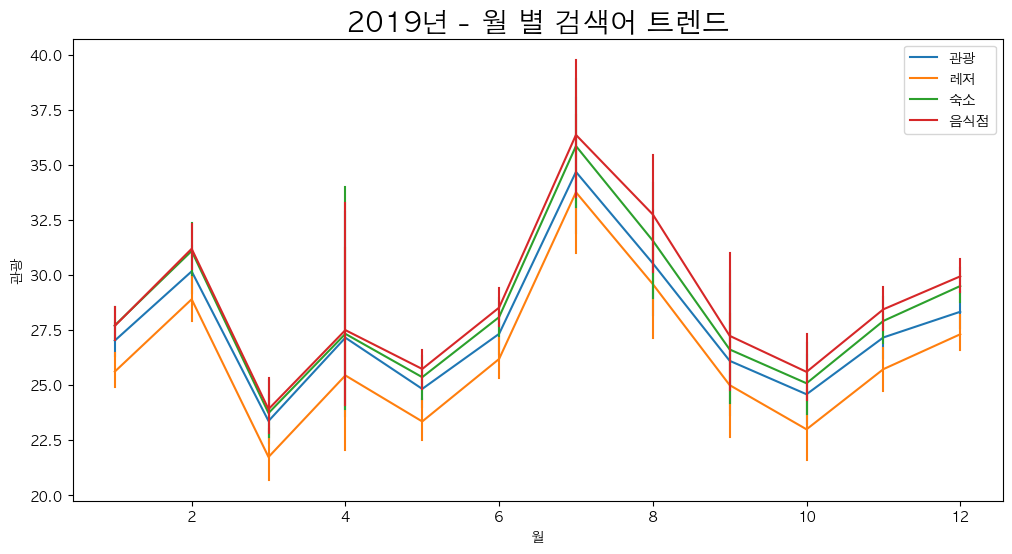

In [119]:
plot1 =plot_daily_trend_test()

In [86]:
keyword_group_set = {
    'keyword_group_1': {'groupName': "관광", 'keywords': ["관광","명소","부산"]},
    'keyword_group_2': {'groupName': "레저", 'keywords': ["레저","부산"]},
    'keyword_group_3': {'groupName': "숙소", 'keywords': ["숙소","분위기","부산"]},
    'keyword_group_4': {'groupName': "음식점", 'keywords': ["음식점","부산"]},
    'keyword_group_5': {'groupName': "시장", 'keywords': ["시장","부산"]}
}

In [87]:
# 요청 파라미터 설정
startDate = "2019-01-01"
endDate = "2019-12-31"
timeUnit = 'date'
device = ''
ages = []
gender = ''

# 데이터 프레임 정의
add_keyword_groups(keyword_group_set['keyword_group_1'])
add_keyword_groups(keyword_group_set['keyword_group_2'])
add_keyword_groups(keyword_group_set['keyword_group_3'])
add_keyword_groups(keyword_group_set['keyword_group_4'])
add_keyword_groups(keyword_group_set['keyword_group_5'])

df = get_data(url, startDate, endDate, timeUnit, keywordGroups, device, ages, gender)

>>> Num of keywordGroups: 1
>>> Num of keywordGroups: 2
>>> Num of keywordGroups: 3
>>> Num of keywordGroups: 4
>>> Num of keywordGroups: 5


In [97]:
df

,날짜,관광,레저,숙소,음식점,시장,월
0,2019-01-01,24.80849,23.38488,25.09033,26.27547,25.42997,1
1,2019-01-02,26.46336,24.84101,27.12097,26.70183,26.15623,1
2,2019-01-03,26.19959,24.66758,26.57898,26.52478,26.03338,1
3,2019-01-04,25.20595,23.78956,25.76961,25.88524,25.10117,1
4,2019-01-05,24.08585,22.94768,24.75791,25.58173,24.64590,1
...,...,...,...,...,...,...,...
360,2019-12-27,28.28443,27.68824,29.87787,30.25726,28.85893,12
361,2019-12-28,27.85807,27.14265,29.40453,30.34759,29.11909,12
362,2019-12-29,27.65573,27.07399,29.05405,30.02601,28.91675,12
363,2019-12-30,36.29137,35.56149,37.53071,38.20638,36.69966,12


In [89]:
df['월'] = df['날짜'].apply(lambda x: x.month)
df

,날짜,관광,레저,숙소,음식점,시장,월
0,2019-01-01,24.80849,23.38488,25.09033,26.27547,25.42997,1
1,2019-01-02,26.46336,24.84101,27.12097,26.70183,26.15623,1
2,2019-01-03,26.19959,24.66758,26.57898,26.52478,26.03338,1
3,2019-01-04,25.20595,23.78956,25.76961,25.88524,25.10117,1
4,2019-01-05,24.08585,22.94768,24.75791,25.58173,24.64590,1
...,...,...,...,...,...,...,...
360,2019-12-27,28.28443,27.68824,29.87787,30.25726,28.85893,12
361,2019-12-28,27.85807,27.14265,29.40453,30.34759,29.11909,12
362,2019-12-29,27.65573,27.07399,29.05405,30.02601,28.91675,12
363,2019-12-30,36.29137,35.56149,37.53071,38.20638,36.69966,12


TypeError: boxplot() got an unexpected keyword argument 'label'

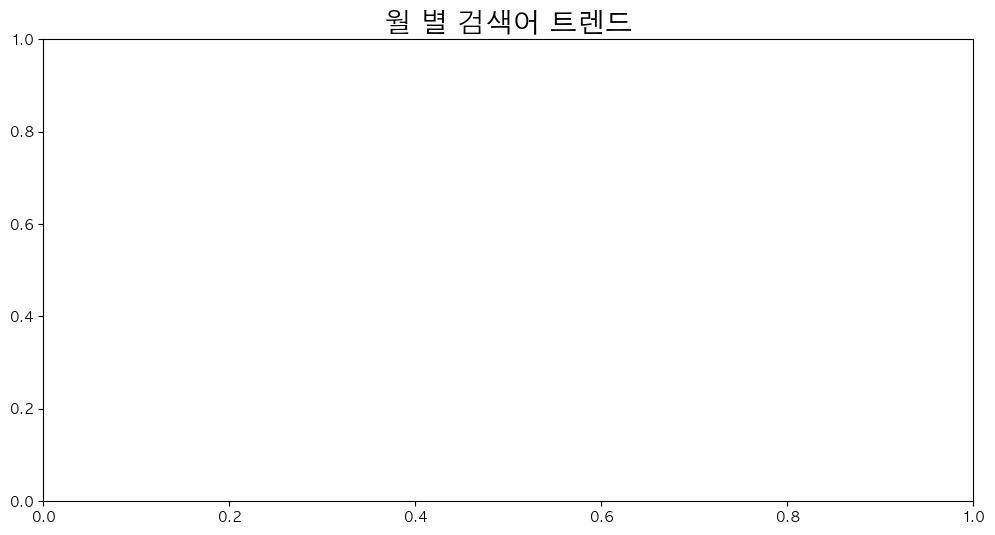

In [94]:
korean_font()
plot1 =plot_daily_trend_test()